In [2]:
import numpy as np
import importlib 
import preprocessing
importlib.reload(preprocessing)
from preprocessing import *
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential, model_from_json
from keras.layers import Conv1D,Conv2D,MaxPooling1D,Flatten,Dense,Dropout,BatchNormalization, GRU, LSTM, RNN
from keras import regularizers as reg

In [13]:
def cnn(conv_layers=3,conv_sizes=(64,128,256),filter_size=3, fc_layers=2,fc_sizes=(4096,2048),
        dropout=0.5,pool_size=2,init='he_uniform',act='relu',optim='adam',pool=True,
        reg = reg.l2(0.05)):

    classifier = Sequential()
    for i in range(conv_layers):
        classifier.add(Conv1D(conv_sizes[i], filter_size, input_shape = X_train.shape[1:],
                              activation = act,kernel_initializer=init,kernel_regularizer=reg))
        classifier.add(BatchNormalization())
        if pool:
            classifier.add(MaxPooling1D(pool_size = 2))
    classifier.add(Flatten())
    for j in range(fc_layers):
        classifier.add(Dense(fc_sizes[j], activation = act,kernel_initializer=init,kernel_regularizer=reg))
        classifier.add(Dropout(dropout))
    classifier.add(Dense(4, activation = 'softmax',kernel_initializer=init))
    classifier.compile(optimizer = optim, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10,batch_size=64)

In [6]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_subject(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 44s 17ms/step - loss: 158.5555 - acc: 0.2775 - val_loss: 108.8778 - val_acc: 0.4200
Epoch 2/10
2508/2508 [==============================] - 45s 18ms/step - loss: 78.7335 - acc: 0.3130 - val_loss: 52.1910 - val_acc: 0.3800
Epoch 3/10
2508/2508 [==============================] - 48s 19ms/step - loss: 38.9754 - acc: 0.3884 - val_loss: 28.3719 - val_acc: 0.5200
Epoch 4/10
2508/2508 [==============================] - 52s 21ms/step - loss: 22.9242 - acc: 0.4430 - val_loss: 18.2501 - val_acc: 0.4200
Epoch 5/10
2508/2508 [==============================] - 49s 20ms/step - loss: 15.2853 - acc: 0.5307 - val_loss: 12.9705 - val_acc: 0.4600
Epoch 6/10
2508/2508 [==============================] - 51s 21ms/step - loss: 10.9946 - acc: 0.6156 - val_loss: 9.7280 - val_acc: 0.5000
Epoch 7/10
2508/2508 [==============================] - 48s 19ms/step - loss: 8.4629 - acc: 0.6754 - val_loss: 7.8667 - val_a

In [7]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_subject(X, y)
cnn(conv_layers=2,conv_sizes=(64,128),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 82s 33ms/step - loss: 179.8960 - acc: 0.2687 - val_loss: 133.7861 - val_acc: 0.3400
Epoch 2/10
2508/2508 [==============================] - 77s 31ms/step - loss: 108.6502 - acc: 0.3329 - val_loss: 81.5719 - val_acc: 0.2600
Epoch 3/10
2508/2508 [==============================] - 81s 32ms/step - loss: 69.4206 - acc: 0.3345 - val_loss: 54.2010 - val_acc: 0.3400
Epoch 4/10
2508/2508 [==============================] - 81s 32ms/step - loss: 44.0824 - acc: 0.3828 - val_loss: 34.9560 - val_acc: 0.3800
Epoch 5/10
2508/2508 [==============================] - 75s 30ms/step - loss: 30.0703 - acc: 0.4163 - val_loss: 25.7494 - val_acc: 0.4400
Epoch 6/10
2508/2508 [==============================] - 76s 30ms/step - loss: 22.8578 - acc: 0.5191 - val_loss: 20.6468 - val_acc: 0.3600
Epoch 7/10
2508/2508 [==============================] - 75s 30ms/step - loss: 18.6083 - acc: 0.5742 - val_loss: 16.8763 - v

In [8]:
X, y = import_data(every=True)
X_train,X_test,y_train,y_test = train_test_subject(X, y)
cnn(conv_layers=2,conv_sizes=(64,128),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 88s 35ms/step - loss: 180.9439 - acc: 0.3002 - val_loss: 135.7623 - val_acc: 0.5000
Epoch 2/10
2508/2508 [==============================] - 76s 30ms/step - loss: 108.8248 - acc: 0.4326 - val_loss: 80.3751 - val_acc: 0.5800
Epoch 3/10
2508/2508 [==============================] - 76s 30ms/step - loss: 65.9916 - acc: 0.5263 - val_loss: 50.8818 - val_acc: 0.6000
Epoch 4/10
2508/2508 [==============================] - 77s 31ms/step - loss: 41.3049 - acc: 0.6013 - val_loss: 33.5433 - val_acc: 0.6400
Epoch 5/10
2508/2508 [==============================] - 75s 30ms/step - loss: 28.8892 - acc: 0.6639 - val_loss: 25.1781 - val_acc: 0.5600
Epoch 6/10
2508/2508 [==============================] - 75s 30ms/step - loss: 22.0951 - acc: 0.7293 - val_loss: 19.6131 - val_acc: 0.5400
Epoch 7/10
2508/2508 [==============================] - 75s 30ms/step - loss: 16.9329 - acc: 0.7663 - val_loss: 15.5828 - v

In [10]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_subject(X, y)
cnn(conv_layers=3,conv_sizes=(64,128,256),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 100s 40ms/step - loss: 194.1973 - acc: 0.2763 - val_loss: 140.4282 - val_acc: 0.3200
Epoch 2/10
2508/2508 [==============================] - 95s 38ms/step - loss: 114.7411 - acc: 0.2891 - val_loss: 85.1232 - val_acc: 0.3000
Epoch 3/10
2508/2508 [==============================] - 101s 40ms/step - loss: 74.8019 - acc: 0.2891 - val_loss: 55.5518 - val_acc: 0.3600
Epoch 4/10
2508/2508 [==============================] - 97s 39ms/step - loss: 48.6001 - acc: 0.2608 - val_loss: 38.2331 - val_acc: 0.2400
Epoch 5/10
2508/2508 [==============================] - 96s 38ms/step - loss: 31.9864 - acc: 0.2600 - val_loss: 26.0713 - val_acc: 0.1600
Epoch 6/10
2508/2508 [==============================] - 100s 40ms/step - loss: 22.7332 - acc: 0.2847 - val_loss: 19.7055 - val_acc: 0.1800
Epoch 7/10
2508/2508 [==============================] - 97s 39ms/step - loss: 17.7525 - acc: 0.3226 - val_loss: 15.7427 

In [11]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 47s 19ms/step - loss: 159.9225 - acc: 0.2707 - val_loss: 112.6519 - val_acc: 0.3600
Epoch 2/10
2508/2508 [==============================] - 45s 18ms/step - loss: 82.3820 - acc: 0.3242 - val_loss: 55.2994 - val_acc: 0.3600
Epoch 3/10
2508/2508 [==============================] - 45s 18ms/step - loss: 41.6067 - acc: 0.3700 - val_loss: 30.4180 - val_acc: 0.3200
Epoch 4/10
2508/2508 [==============================] - 45s 18ms/step - loss: 24.4766 - acc: 0.4394 - val_loss: 19.4561 - val_acc: 0.3200
Epoch 5/10
2508/2508 [==============================] - 46s 18ms/step - loss: 16.3552 - acc: 0.4936 - val_loss: 13.7823 - val_acc: 0.4600
Epoch 6/10
2508/2508 [==============================] - 46s 18ms/step - loss: 11.7640 - acc: 0.5869 - val_loss: 10.3010 - val_acc: 0.4800
Epoch 7/10
2508/2508 [==============================] - 46s 18ms/step - loss: 8.9055 - acc: 0.6507 - val_loss: 8.2243 - val_

In [12]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_subject(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 49s 19ms/step - loss: 162.2662 - acc: 0.2795 - val_loss: 116.0613 - val_acc: 0.4200
Epoch 2/10
2508/2508 [==============================] - 45s 18ms/step - loss: 86.2183 - acc: 0.3070 - val_loss: 58.8661 - val_acc: 0.4400
Epoch 3/10
2508/2508 [==============================] - 45s 18ms/step - loss: 44.7519 - acc: 0.3688 - val_loss: 33.0477 - val_acc: 0.4000
Epoch 4/10
2508/2508 [==============================] - 45s 18ms/step - loss: 26.8329 - acc: 0.4474 - val_loss: 21.5491 - val_acc: 0.3600
Epoch 5/10
2508/2508 [==============================] - 45s 18ms/step - loss: 18.0558 - acc: 0.5614 - val_loss: 15.3544 - val_acc: 0.4400
Epoch 6/10
2508/2508 [==============================] - 45s 18ms/step - loss: 13.2460 - acc: 0.6495 - val_loss: 11.7798 - val_acc: 0.3200
Epoch 7/10
2508/2508 [==============================] - 45s 18ms/step - loss: 10.1065 - acc: 0.7137 - val_loss: 9.5340 - val

In [13]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_subject(X, y, train_all=False)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256))

Train on 237 samples, validate on 50 samples
Epoch 1/10
237/237 [==============================] - 7s 30ms/step - loss: 194.7505 - acc: 0.2700 - val_loss: 189.7929 - val_acc: 0.2800
Epoch 2/10
237/237 [==============================] - 5s 19ms/step - loss: 188.8520 - acc: 0.4346 - val_loss: 183.7737 - val_acc: 0.3400
Epoch 3/10
237/237 [==============================] - 5s 19ms/step - loss: 182.9034 - acc: 0.4852 - val_loss: 175.9697 - val_acc: 0.3200
Epoch 4/10
237/237 [==============================] - 5s 19ms/step - loss: 174.8185 - acc: 0.4768 - val_loss: 167.5815 - val_acc: 0.3400
Epoch 5/10
237/237 [==============================] - 5s 20ms/step - loss: 166.4372 - acc: 0.5232 - val_loss: 159.2646 - val_acc: 0.4000
Epoch 6/10
237/237 [==============================] - 5s 19ms/step - loss: 158.0532 - acc: 0.5274 - val_loss: 150.7661 - val_acc: 0.3600
Epoch 7/10
237/237 [==============================] - 5s 20ms/step - loss: 148.8037 - acc: 0.5907 - val_loss: 142.1756 - val_acc: 0.4

In [14]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256),dropout=0.1)

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 48s 19ms/step - loss: 116.8633 - acc: 0.2811 - val_loss: 52.4488 - val_acc: 0.3000
Epoch 2/10
2508/2508 [==============================] - 45s 18ms/step - loss: 34.0075 - acc: 0.4717 - val_loss: 21.8247 - val_acc: 0.4800
Epoch 3/10
2508/2508 [==============================] - 45s 18ms/step - loss: 16.5873 - acc: 0.5435 - val_loss: 12.4133 - val_acc: 0.4200
Epoch 4/10
2508/2508 [==============================] - 45s 18ms/step - loss: 9.8543 - acc: 0.6212 - val_loss: 8.2341 - val_acc: 0.3000
Epoch 5/10
2508/2508 [==============================] - 45s 18ms/step - loss: 6.6221 - acc: 0.6535 - val_loss: 5.9402 - val_acc: 0.3800
Epoch 6/10
2508/2508 [==============================] - 44s 17ms/step - loss: 4.7191 - acc: 0.6910 - val_loss: 4.5729 - val_acc: 0.4800
Epoch 7/10
2508/2508 [==============================] - 44s 17ms/step - loss: 3.6591 - acc: 0.7141 - val_loss: 3.7711 - val_acc: 0.

In [15]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256),dropout=0.9)

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 47s 19ms/step - loss: 144.8812 - acc: 0.2544 - val_loss: 116.8221 - val_acc: 0.2000
Epoch 2/10
2508/2508 [==============================] - 44s 18ms/step - loss: 111.2850 - acc: 0.2604 - val_loss: 98.6314 - val_acc: 0.2000
Epoch 3/10
2508/2508 [==============================] - 44s 17ms/step - loss: 92.6991 - acc: 0.2472 - val_loss: 83.3472 - val_acc: 0.2000
Epoch 4/10
2508/2508 [==============================] - 44s 18ms/step - loss: 78.4153 - acc: 0.2604 - val_loss: 73.1038 - val_acc: 0.2000
Epoch 5/10
2508/2508 [==============================] - 44s 17ms/step - loss: 69.7744 - acc: 0.2528 - val_loss: 61.4926 - val_acc: 0.2200
Epoch 6/10
2508/2508 [==============================] - 44s 17ms/step - loss: 65.2892 - acc: 0.2588 - val_loss: 61.6339 - val_acc: 0.2000
Epoch 7/10
2508/2508 [==============================] - 44s 17ms/step - loss: 65.2287 - acc: 0.2520 - val_loss: 64.9013 - v

In [16]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256),pool=False)

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 138s 55ms/step - loss: 207.7946 - acc: 0.2699 - val_loss: 182.2633 - val_acc: 0.1800
Epoch 2/10
2508/2508 [==============================] - 115s 46ms/step - loss: 158.2318 - acc: 0.3329 - val_loss: 127.0504 - val_acc: 0.3600
Epoch 3/10
2508/2508 [==============================] - 114s 45ms/step - loss: 104.6675 - acc: 0.3389 - val_loss: 76.5370 - val_acc: 0.2800
Epoch 4/10
2508/2508 [==============================] - 114s 45ms/step - loss: 59.0766 - acc: 0.3700 - val_loss: 44.9630 - val_acc: 0.3000
Epoch 5/10
2508/2508 [==============================] - 113s 45ms/step - loss: 38.2590 - acc: 0.4434 - val_loss: 32.3452 - val_acc: 0.3000
Epoch 6/10
2508/2508 [==============================] - 114s 45ms/step - loss: 28.8875 - acc: 0.5319 - val_loss: 25.7201 - val_acc: 0.3800
Epoch 7/10
2508/2508 [==============================] - 113s 45ms/step - loss: 23.4759 - acc: 0.6164 - val_loss: 21

In [17]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256),act='tanh')

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 49s 20ms/step - loss: 114.9106 - acc: 0.2807 - val_loss: 51.3049 - val_acc: 0.3200
Epoch 2/10
2508/2508 [==============================] - 44s 17ms/step - loss: 34.8338 - acc: 0.3206 - val_loss: 23.3295 - val_acc: 0.2400
Epoch 3/10
2508/2508 [==============================] - 44s 17ms/step - loss: 17.0160 - acc: 0.4031 - val_loss: 12.0474 - val_acc: 0.3800
Epoch 4/10
2508/2508 [==============================] - 44s 18ms/step - loss: 9.2830 - acc: 0.4769 - val_loss: 6.7985 - val_acc: 0.4400
Epoch 5/10
2508/2508 [==============================] - 44s 17ms/step - loss: 5.4594 - acc: 0.5327 - val_loss: 4.4768 - val_acc: 0.6000
Epoch 6/10
2508/2508 [==============================] - 44s 18ms/step - loss: 3.7812 - acc: 0.5443 - val_loss: 3.3764 - val_acc: 0.4800
Epoch 7/10
2508/2508 [==============================] - 44s 18ms/step - loss: 3.0634 - acc: 0.5343 - val_loss: 2.6439 - val_acc: 0.

In [19]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y,standardize=False)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 47s 19ms/step - loss: 159.5693 - acc: 0.2731 - val_loss: 109.8854 - val_acc: 0.3400
Epoch 2/10
2508/2508 [==============================] - 41s 16ms/step - loss: 81.8013 - acc: 0.2867 - val_loss: 56.1252 - val_acc: 0.3200
Epoch 3/10
2508/2508 [==============================] - 41s 16ms/step - loss: 42.8351 - acc: 0.3537 - val_loss: 31.7339 - val_acc: 0.3400
Epoch 4/10
2508/2508 [==============================] - 41s 16ms/step - loss: 25.8128 - acc: 0.4011 - val_loss: 20.6861 - val_acc: 0.3200
Epoch 5/10
2508/2508 [==============================] - 44s 18ms/step - loss: 17.4036 - acc: 0.4705 - val_loss: 14.6507 - val_acc: 0.4000
Epoch 6/10
2508/2508 [==============================] - 45s 18ms/step - loss: 12.5484 - acc: 0.5578 - val_loss: 11.1175 - val_acc: 0.2800
Epoch 7/10
2508/2508 [==============================] - 45s 18ms/step - loss: 9.4960 - acc: 0.6144 - val_loss: 8.7254 - val_

In [21]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_subject(X, y,standardize=False)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 46s 19ms/step - loss: 158.8487 - acc: 0.2675 - val_loss: 109.3959 - val_acc: 0.2600
Epoch 2/10
2508/2508 [==============================] - 43s 17ms/step - loss: 81.1990 - acc: 0.3010 - val_loss: 55.6765 - val_acc: 0.4200
Epoch 3/10
2508/2508 [==============================] - 44s 18ms/step - loss: 42.8910 - acc: 0.3250 - val_loss: 32.0296 - val_acc: 0.3600
Epoch 4/10
2508/2508 [==============================] - 45s 18ms/step - loss: 26.2434 - acc: 0.3541 - val_loss: 21.1594 - val_acc: 0.2600
Epoch 5/10
2508/2508 [==============================] - 45s 18ms/step - loss: 17.9581 - acc: 0.4043 - val_loss: 15.0345 - val_acc: 0.2800
Epoch 6/10
2508/2508 [==============================] - 46s 18ms/step - loss: 12.9795 - acc: 0.4928 - val_loss: 11.2873 - val_acc: 0.3400
Epoch 7/10
2508/2508 [==============================] - 46s 18ms/step - loss: 9.8094 - acc: 0.5690 - val_loss: 8.8523 - val_

In [22]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=3,conv_sizes=(64,64,64),fc_layers=2,fc_sizes=(512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 36s 14ms/step - loss: 78.3927 - acc: 0.2811 - val_loss: 54.1971 - val_acc: 0.4200
Epoch 2/10
2508/2508 [==============================] - 32s 13ms/step - loss: 39.9695 - acc: 0.4139 - val_loss: 28.1317 - val_acc: 0.3400
Epoch 3/10
2508/2508 [==============================] - 32s 13ms/step - loss: 21.9524 - acc: 0.5187 - val_loss: 17.0331 - val_acc: 0.3800
Epoch 4/10
2508/2508 [==============================] - 32s 13ms/step - loss: 13.8422 - acc: 0.6184 - val_loss: 11.5305 - val_acc: 0.4600
Epoch 5/10
2508/2508 [==============================] - 32s 13ms/step - loss: 9.5428 - acc: 0.7069 - val_loss: 8.4462 - val_acc: 0.4800
Epoch 6/10
2508/2508 [==============================] - 32s 13ms/step - loss: 7.1167 - acc: 0.7428 - val_loss: 6.9248 - val_acc: 0.2800
Epoch 7/10
2508/2508 [==============================] - 32s 13ms/step - loss: 5.6396 - acc: 0.7400 - val_loss: 5.4393 - val_acc: 0

In [23]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=3,conv_sizes=(32,32,32),fc_layers=2,fc_sizes=(512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 19s 7ms/step - loss: 69.7520 - acc: 0.2592 - val_loss: 47.7798 - val_acc: 0.4200
Epoch 2/10
2508/2508 [==============================] - 15s 6ms/step - loss: 34.3703 - acc: 0.3991 - val_loss: 23.0490 - val_acc: 0.5200
Epoch 3/10
2508/2508 [==============================] - 15s 6ms/step - loss: 17.5111 - acc: 0.5096 - val_loss: 12.9686 - val_acc: 0.6600
Epoch 4/10
2508/2508 [==============================] - 15s 6ms/step - loss: 10.7004 - acc: 0.5758 - val_loss: 8.8348 - val_acc: 0.5400
Epoch 5/10
2508/2508 [==============================] - 15s 6ms/step - loss: 7.4597 - acc: 0.6655 - val_loss: 6.5786 - val_acc: 0.6200
Epoch 6/10
2508/2508 [==============================] - 15s 6ms/step - loss: 5.7169 - acc: 0.7117 - val_loss: 5.2592 - val_acc: 0.6800
Epoch 7/10
2508/2508 [==============================] - 15s 6ms/step - loss: 4.5384 - acc: 0.7532 - val_loss: 4.5031 - val_acc: 0.6400
Ep

In [24]:
X, y = import_data(every=True)
X_train,X_test,y_train,y_test = train_test_subject(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 49s 20ms/step - loss: 158.0848 - acc: 0.3106 - val_loss: 109.4643 - val_acc: 0.5200
Epoch 2/10
2508/2508 [==============================] - 45s 18ms/step - loss: 80.3029 - acc: 0.4131 - val_loss: 54.3876 - val_acc: 0.5200
Epoch 3/10
2508/2508 [==============================] - 45s 18ms/step - loss: 41.0698 - acc: 0.5602 - val_loss: 30.1598 - val_acc: 0.7200
Epoch 4/10
2508/2508 [==============================] - 45s 18ms/step - loss: 24.2116 - acc: 0.6886 - val_loss: 19.4223 - val_acc: 0.6600
Epoch 5/10
2508/2508 [==============================] - 45s 18ms/step - loss: 16.1872 - acc: 0.7432 - val_loss: 13.7145 - val_acc: 0.6000
Epoch 6/10
2508/2508 [==============================] - 44s 18ms/step - loss: 11.5097 - acc: 0.7986 - val_loss: 10.3072 - val_acc: 0.6000
Epoch 7/10
2508/2508 [==============================] - 44s 18ms/step - loss: 8.7966 - acc: 0.8022 - val_loss: 7.8374 - val_

In [25]:
X, y = import_data(every=True)
X_train,X_test,y_train,y_test = train_test_subject(X, y)
cnn(conv_layers=3,conv_sizes=(64,128,256),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 96s 38ms/step - loss: 197.1471 - acc: 0.2911 - val_loss: 145.7357 - val_acc: 0.3800
Epoch 2/10
2508/2508 [==============================] - 89s 36ms/step - loss: 121.1017 - acc: 0.3939 - val_loss: 90.1208 - val_acc: 0.4800
Epoch 3/10
2508/2508 [==============================] - 90s 36ms/step - loss: 79.3099 - acc: 0.4737 - val_loss: 62.6111 - val_acc: 0.3800
Epoch 4/10
2508/2508 [==============================] - 89s 36ms/step - loss: 53.6940 - acc: 0.5331 - val_loss: 43.5380 - val_acc: 0.4400
Epoch 5/10
2508/2508 [==============================] - 89s 36ms/step - loss: 36.7957 - acc: 0.5873 - val_loss: 30.8730 - val_acc: 0.4600
Epoch 6/10
2508/2508 [==============================] - 89s 35ms/step - loss: 26.9699 - acc: 0.6667 - val_loss: 23.9219 - val_acc: 0.3600
Epoch 7/10
2508/2508 [==============================] - 89s 36ms/step - loss: 21.5121 - acc: 0.7077 - val_loss: 19.3855 - v

In [26]:
X, y = import_data(every=True)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 48s 19ms/step - loss: 159.1160 - acc: 0.3118 - val_loss: 110.2807 - val_acc: 0.5000
Epoch 2/10
2508/2508 [==============================] - 43s 17ms/step - loss: 80.6130 - acc: 0.4394 - val_loss: 54.3468 - val_acc: 0.6400
Epoch 3/10
2508/2508 [==============================] - 44s 18ms/step - loss: 41.1975 - acc: 0.5781 - val_loss: 30.3475 - val_acc: 0.7000
Epoch 4/10
2508/2508 [==============================] - 43s 17ms/step - loss: 24.5231 - acc: 0.6599 - val_loss: 19.7199 - val_acc: 0.7200
Epoch 5/10
2508/2508 [==============================] - 44s 17ms/step - loss: 16.5594 - acc: 0.7376 - val_loss: 14.0093 - val_acc: 0.6800
Epoch 6/10
2508/2508 [==============================] - 43s 17ms/step - loss: 11.9342 - acc: 0.7791 - val_loss: 10.4729 - val_acc: 0.6600
Epoch 7/10
2508/2508 [==============================] - 44s 17ms/step - loss: 9.1621 - acc: 0.7943 - val_loss: 8.1274 - val_

In [28]:
#Redefine CNN with the batchnorm commented 
# This is without batch norm
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 144s 57ms/step - loss: 123.4923 - acc: 0.2544 - val_loss: 68.2398 - val_acc: 0.2400
Epoch 2/10
2508/2508 [==============================] - 36s 14ms/step - loss: 49.9102 - acc: 0.2500 - val_loss: 36.3000 - val_acc: 0.2400
Epoch 3/10
2508/2508 [==============================] - 36s 15ms/step - loss: 29.8038 - acc: 0.2711 - val_loss: 24.2531 - val_acc: 0.3400
Epoch 4/10
2508/2508 [==============================] - 37s 15ms/step - loss: 20.7584 - acc: 0.2592 - val_loss: 17.4746 - val_acc: 0.2800
Epoch 5/10
2508/2508 [==============================] - 37s 15ms/step - loss: 15.2254 - acc: 0.2628 - val_loss: 13.0385 - val_acc: 0.2400
Epoch 6/10
2508/2508 [==============================] - 37s 15ms/step - loss: 11.4687 - acc: 0.2703 - val_loss: 9.9368 - val_acc: 0.2000
Epoch 7/10
2508/2508 [==============================] - 37s 15ms/step - loss: 8.8116 - acc: 0.2687 - val_loss: 7.7059 - val_a

In [29]:
#Redefine CNN with the batchnorm commented 
# This is without batch norm
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_subject(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 260s 104ms/step - loss: 122.0724 - acc: 0.2600 - val_loss: 64.7137 - val_acc: 0.4400
Epoch 2/10
2508/2508 [==============================] - 36s 14ms/step - loss: 46.6596 - acc: 0.2580 - val_loss: 33.4996 - val_acc: 0.4400
Epoch 3/10
2508/2508 [==============================] - 37s 15ms/step - loss: 27.3811 - acc: 0.2652 - val_loss: 22.1449 - val_acc: 0.3600
Epoch 4/10
2508/2508 [==============================] - 37s 15ms/step - loss: 18.8760 - acc: 0.2600 - val_loss: 15.8199 - val_acc: 0.1200
Epoch 5/10
2508/2508 [==============================] - 37s 15ms/step - loss: 13.7118 - acc: 0.2608 - val_loss: 11.6788 - val_acc: 0.1200
Epoch 6/10
2508/2508 [==============================] - 36s 14ms/step - loss: 10.2180 - acc: 0.2484 - val_loss: 8.8044 - val_acc: 0.2600
Epoch 7/10
2508/2508 [==============================] - 35s 14ms/step - loss: 7.7765 - acc: 0.2428 - val_loss: 6.7736 - val_

In [5]:
import matplotlib.pyplot as plt
def cnn_plot(conv_layers=3,conv_sizes=(64,128,256),filter_size=3, fc_layers=2,fc_sizes=(4096,2048),
        dropout=0.5,pool_size=2,init='he_uniform',act='relu',optim='adam',pool=True,
        reg = reg.l2(0.05),epochs=10):

    classifier = Sequential()
    for i in range(conv_layers):
        classifier.add(Conv1D(conv_sizes[i], filter_size, input_shape = X_train.shape[1:],
                              activation = act,kernel_initializer=init,kernel_regularizer=reg))
        classifier.add(BatchNormalization())
        if pool:
            classifier.add(MaxPooling1D(pool_size = 2))
    classifier.add(Flatten())
    for j in range(fc_layers):
        classifier.add(Dense(fc_sizes[j], activation = act,kernel_initializer=init,kernel_regularizer=reg))
        classifier.add(Dropout(dropout))
    classifier.add(Dense(4, activation = 'softmax',kernel_initializer=init))
    classifier.compile(optimizer = optim, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    history = classifier.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=epochs,batch_size=64)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 56s 22ms/step - loss: 162.8385 - acc: 0.2663 - val_loss: 115.5292 - val_acc: 0.3200
Epoch 2/10
2508/2508 [==============================] - 53s 21ms/step - loss: 87.2221 - acc: 0.3038 - val_loss: 60.4795 - val_acc: 0.3200
Epoch 3/10
2508/2508 [==============================] - 55s 22ms/step - loss: 46.0319 - acc: 0.3437 - val_loss: 33.9589 - val_acc: 0.3600
Epoch 4/10
2508/2508 [==============================] - 54s 22ms/step - loss: 27.5551 - acc: 0.4075 - val_loss: 22.0934 - val_acc: 0.4200
Epoch 5/10
2508/2508 [==============================] - 54s 21ms/step - loss: 18.7652 - acc: 0.4896 - val_loss: 15.9906 - val_acc: 0.4600
Epoch 6/10
2508/2508 [==============================] - 54s 21ms/step - loss: 13.8122 - acc: 0.5638 - val_loss: 12.1956 - val_acc: 0.4400
Epoch 7/10
2508/2508 [===================

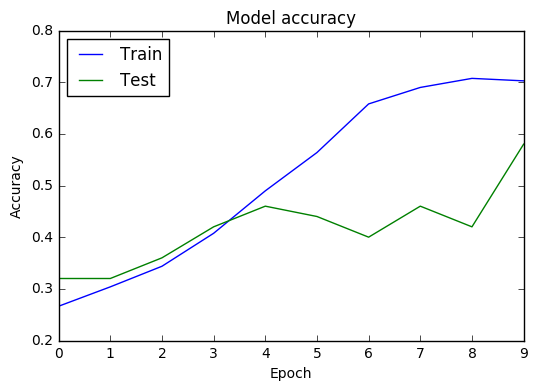

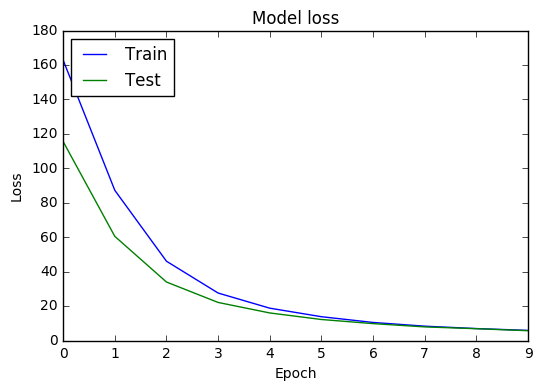

In [7]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn_plot(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256))

Train on 2508 samples, validate on 50 samples
Epoch 1/30
2508/2508 [==============================] - 19s 8ms/step - loss: 68.6009 - acc: 0.2771 - val_loss: 46.1892 - val_acc: 0.4600
Epoch 2/30
2508/2508 [==============================] - 17s 7ms/step - loss: 32.6494 - acc: 0.3975 - val_loss: 21.4713 - val_acc: 0.5000
Epoch 3/30
2508/2508 [==============================] - 16s 7ms/step - loss: 16.1396 - acc: 0.4852 - val_loss: 11.9447 - val_acc: 0.5400
Epoch 4/30
2508/2508 [==============================] - 17s 7ms/step - loss: 9.7183 - acc: 0.5993 - val_loss: 8.1069 - val_acc: 0.5400
Epoch 5/30
2508/2508 [==============================] - 17s 7ms/step - loss: 6.7585 - acc: 0.6722 - val_loss: 6.2482 - val_acc: 0.5000
Epoch 6/30
2508/2508 [==============================] - 17s 7ms/step - loss: 5.2298 - acc: 0.7213 - val_loss: 5.2076 - val_acc: 0.4000
Epoch 7/30
2508/2508 [==============================] - 17s 7ms/step - loss: 4.3045 - acc: 0.7751 - val_loss: 4.5522 - val_acc: 0.4000
Epo

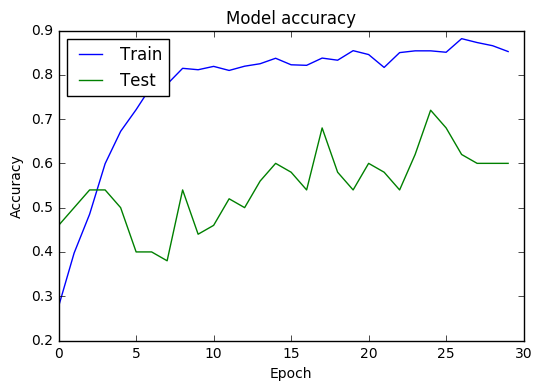

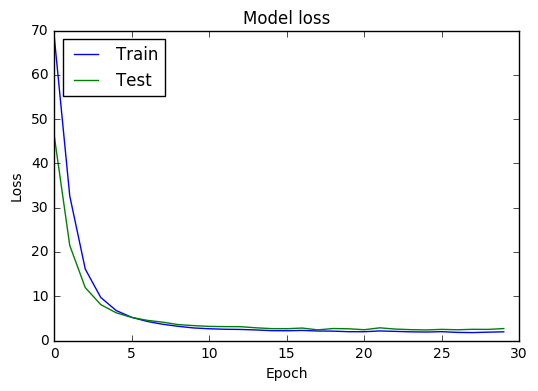

In [9]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn_plot(conv_layers=3,conv_sizes=(32,32,32),fc_layers=2,fc_sizes=(512,256),epochs=30)

Train on 2508 samples, validate on 50 samples
Epoch 1/30
2508/2508 [==============================] - 56s 22ms/step - loss: 160.6935 - acc: 0.2711 - val_loss: 114.0267 - val_acc: 0.2600
Epoch 2/30
2508/2508 [==============================] - 52s 21ms/step - loss: 83.3164 - acc: 0.3198 - val_loss: 56.1847 - val_acc: 0.3200
Epoch 3/30
2508/2508 [==============================] - 51s 20ms/step - loss: 42.3319 - acc: 0.3565 - val_loss: 30.9091 - val_acc: 0.2600
Epoch 4/30
2508/2508 [==============================] - 51s 20ms/step - loss: 24.8081 - acc: 0.4215 - val_loss: 19.6184 - val_acc: 0.3600
Epoch 5/30
2508/2508 [==============================] - 50s 20ms/step - loss: 16.4112 - acc: 0.5000 - val_loss: 13.6920 - val_acc: 0.5400
Epoch 6/30
2508/2508 [==============================] - 51s 20ms/step - loss: 11.6850 - acc: 0.5941 - val_loss: 10.1964 - val_acc: 0.4200
Epoch 7/30
2508/2508 [==============================] - 54s 22ms/step - loss: 8.8345 - acc: 0.6312 - val_loss: 8.0660 - val_

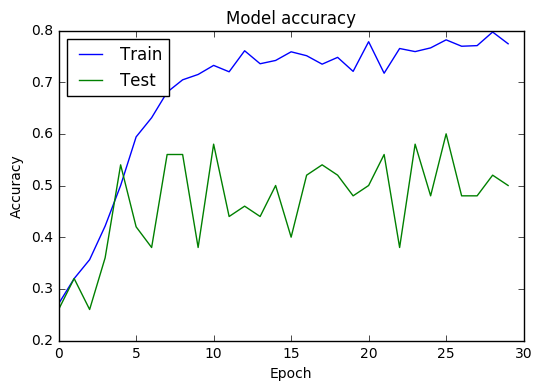

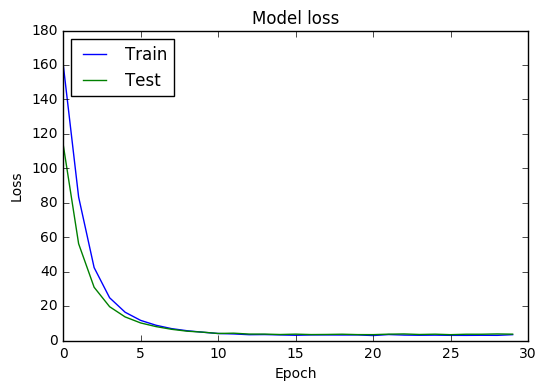

In [11]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn_plot(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256),epochs=30)

In [14]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256),pool=False)

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 152s 61ms/step - loss: 208.9493 - acc: 0.2791 - val_loss: 184.0629 - val_acc: 0.3000
Epoch 2/10
2508/2508 [==============================] - 132s 52ms/step - loss: 166.3484 - acc: 0.3274 - val_loss: 137.8191 - val_acc: 0.3800
Epoch 3/10
2508/2508 [==============================] - 132s 52ms/step - loss: 112.1459 - acc: 0.3888 - val_loss: 81.6859 - val_acc: 0.3400
Epoch 4/10
2508/2508 [==============================] - 145s 58ms/step - loss: 64.2647 - acc: 0.4358 - val_loss: 49.2729 - val_acc: 0.4200
Epoch 5/10
2508/2508 [==============================] - 163s 65ms/step - loss: 41.3984 - acc: 0.5295 - val_loss: 34.8703 - val_acc: 0.4200
Epoch 6/10
2508/2508 [==============================] - 153s 61ms/step - loss: 31.1896 - acc: 0.6400 - val_loss: 27.8777 - val_acc: 0.4800
Epoch 7/10
2508/2508 [==============================] - 158s 63ms/step - loss: 25.4837 - acc: 0.7253 - val_loss: 23

In [16]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=2,conv_sizes=(64,64),fc_layers=3,fc_sizes=(1024,512,256),act='sigmoid')

Train on 2508 samples, validate on 50 samples
Epoch 1/10
2508/2508 [==============================] - 56s 22ms/step - loss: 68.3354 - acc: 0.2468 - val_loss: 24.9286 - val_acc: 0.3200
Epoch 2/10
2508/2508 [==============================] - 51s 20ms/step - loss: 14.7737 - acc: 0.2520 - val_loss: 8.0611 - val_acc: 0.2000
Epoch 3/10
2508/2508 [==============================] - 51s 20ms/step - loss: 5.9058 - acc: 0.2496 - val_loss: 4.1839 - val_acc: 0.1800
Epoch 4/10
2508/2508 [==============================] - 51s 20ms/step - loss: 3.5096 - acc: 0.2524 - val_loss: 2.8369 - val_acc: 0.2000
Epoch 5/10
2508/2508 [==============================] - 52s 21ms/step - loss: 2.5876 - acc: 0.2269 - val_loss: 2.1879 - val_acc: 0.3200
Epoch 6/10
2508/2508 [==============================] - 50s 20ms/step - loss: 2.0925 - acc: 0.2600 - val_loss: 1.9001 - val_acc: 0.3200
Epoch 7/10
2508/2508 [==============================] - 50s 20ms/step - loss: 1.8314 - acc: 0.2376 - val_loss: 1.6745 - val_acc: 0.3200